<a href="https://colab.research.google.com/github/JribiKaouthar/credit-risk-monte-carlo/blob/main/M%C3%A9thodesDeSimulationProjet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Évaluation du risqe de crédit***

## ***Plan***
1. Introduction
2. Description de la base de données
3. Modèle de simulation des données et évaluation du risque de
4. Modèle d'apprentissage automatique pour l'évaluation du risque de crédit
5. Conclusion
6. Bibliographie

## ***1. Introduction***

Dans le domaine financier, l'évaluation du risque de crédit est une composante essentielle pour les institutions financières et les investisseurs. Le risque de crédit se réfère à la possibilité qu'un emprunteur ne puisse pas rembourser son prêt selon les termes convenus, entraînant ainsi une perte financière pour le prêteur. C'est un aspect crucial à prendre en compte lors de l'octroi de prêts ou de l'investissement dans des produits financiers.

Dans le cadre du module "Méthode de simulation", notre projet vise à explorer l'utilisation des simulations pour évaluer et modéliser le risque de crédit. Les simulations permettent de générer une variété de scénarios possibles.




## ***2. Description de la base de données***
Un problème important pour les modèles de notation de crédit qui doit être souligné est l’indisponibilité de données de crédit réelles. La raison en est que les données de crédit des clients sont confidentielles dans la plupart des institutions financières. Pour ces raisons, nous utiliserons un ensemble de données publiques de Kaggle. Kaggle est une communauté en ligne de scientifiques des données et de praticiens de l'apprentissage automatique qui propose des concours d'apprentissage automatique et une plateforme de données publique.
L'ensemble de données contient des informations sur les clients ayant contracté un prêt auprès d'une institution financière non précisée. Les objectifs de l'analyse sont de rechercher des relations statistiques qui pourraient nous donner un aperçu du risque de crédit et de développer des algorithmes pour prédire les défauts de crédit.
L'ensemble de données contient 12 attributs et 32 581 observations, et sa structure est résumée dans le tableau ci-dessous.



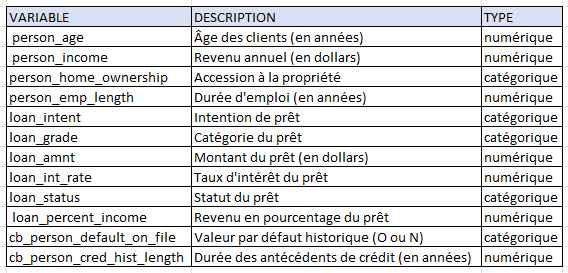


Les covariables potentielles décrivent à la fois les caractéristiques des clients et des prêts. Comme nous pouvons le voir, il existe à la fois des variables numériques et catégorielles. Voyons un peu plus en détail quels sont les niveaux des catégoriques.
* person_home_hownership comporte quatre niveaux : hypothèque, propriété, loyer et autres
* Loan_intent comporte six niveaux différents : consolidation de dettes, éducation, Amélioration de l'habitat, Médical, Personnel, Entreprise
* Loan_grade comporte sept niveaux : A, B, C, D, E, F, G. Une grade prend en compte une combinaison de plusieurs indicateurs de risque de crédit issus du rapport de crédit et de la demande de prêt. Ces facteurs peuvent inclure le niveau de soutien du garant, l’historique de remboursement, les flux de trésorerie, les dépenses annuelles projetées, etc.
* cb_person_default_on_file n'a que deux niveaux : Y si le client a déjà eu un défaut, N sinon
* Loan_status est la variable de réponse et comporte deux niveaux : 0 représente un non-défaut, 1 représente un défaut.

In [ ]:
import pandas as pd
# Charger la base de données
df=pd.read_csv('/content/credit_risk_dataset.csv')
# Les prmières lignes
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# Vérification de l'existance des valeurs manquantes
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Certains champs peuvent comporter des données manquantes, telles que la durée d'emploi (person_emp_length) et le taux d'intérêt du prêt (loan_int_rate), ce qui nécessite une gestion appropriée lors de l'analyse.

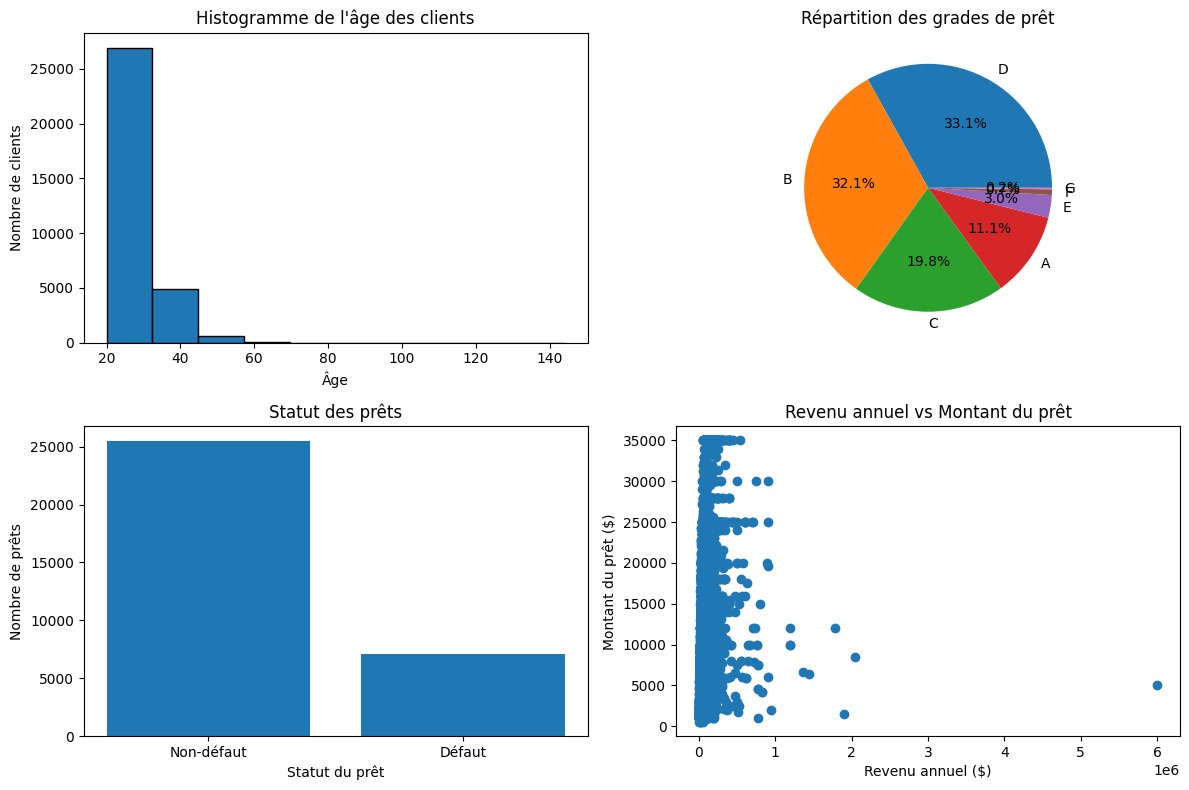

In [ ]:
# Afficher les valeurs des variables nominales

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogramme de l'âge des clients
axs[0, 0].hist(df['person_age'], bins=10, edgecolor='black')
axs[0, 0].set_xlabel('Âge')
axs[0, 0].set_ylabel('Nombre de clients')
axs[0, 0].set_title('Histogramme de l\'âge des clients')

# Diagramme circulaire de la répartition des grades de prêt
axs[0, 1].pie(df['loan_grade'].value_counts(), labels=df['loan_grade'].unique(), autopct='%1.1f%%')
axs[0, 1].set_title('Répartition des grades de prêt')

# Diagramme en barres du statut des prêts
loan_status_counts = df['loan_status'].value_counts()
axs[1, 0].bar(loan_status_counts.index, loan_status_counts.values)
axs[1, 0].set_xlabel('Statut du prêt')
axs[1, 0].set_ylabel('Nombre de prêts')
axs[1, 0].set_title('Statut des prêts')
axs[1, 0].set_xticks([0, 1])
axs[1, 0].set_xticklabels(['Non-défaut', 'Défaut'])

# Nuage de points entre le revenu annuel et le montant du prêt
axs[1, 1].scatter(df['person_income'], df['loan_amnt'])
axs[1, 1].set_xlabel('Revenu annuel ($)')
axs[1, 1].set_ylabel('Montant du prêt ($)')
axs[1, 1].set_title('Revenu annuel vs Montant du prêt')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


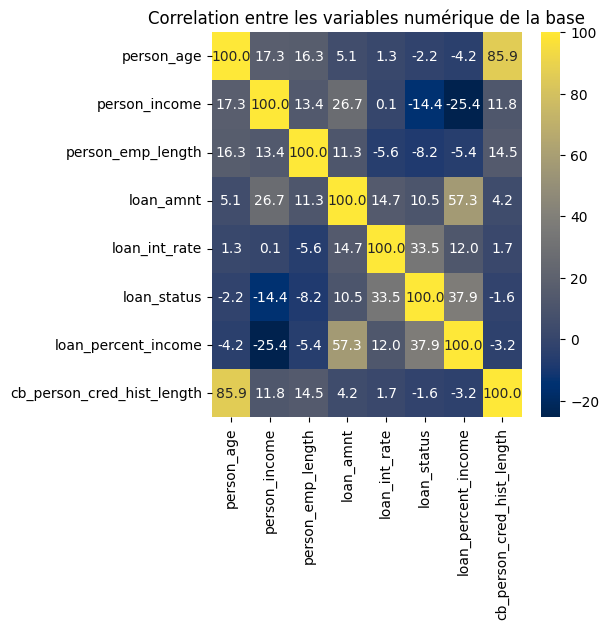

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
data_num = df.select_dtypes(include=['number'])
corr = data_num.corr()

sns.heatmap(corr * 100, cmap='cividis', annot=True, fmt='.1f')

plt.title('Correlation entre les variables numérique de la base')
plt.show()



Ces résultats montrent des corrélations intéressantes entre les variables étudiées, telles que des revenus plus élevés associés à des prêts plus importants mais à un risque de défaut plus faible. De plus, des taux d'intérêt plus élevés sont liés à un risque de défaut accru. Ces observations suggèrent l'importance de considérer ces facteurs dans l'évaluation du risque de crédit et la prise de décisions financières.

## ***3. Modèle de simulation des données et évaluation du risque de crédit***
Dans cette partie on va tenter de définir un modèle qui permet de simuler des données similaire à notre base source et après on va évaluer le risque de crédit

In [ ]:
# Importaion des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dans cette étape, nous allons nettoyer notre ensemble de données en supprimant toutes les lignes contenant des valeurs manquantes (NaN). Cela nous permettra d'avoir un jeu de données propre et prêt à être utilisé pour notre analyse.

In [ ]:
df.dropna(axis=0,inplace=True)

On a remarqué que ensemble de données contient un certain nombre de valeurs aberrantes. En particulier, nous décidons d'éliminer de l'ensemble de données toutes les observations qui présentent une ou plusieurs des caractéristiques suivantes :
* âge du client supérieur à 110 ans,
* durée d'emploi supérieure à 100 ans,
* durée d'emploi supérieure à l'âge du client,
* revenu annuel supérieur à 5 · 106 dollars.

In [ ]:
# Supprimer les lignes avec customer age > 110 ans
df = df[df['person_age'] <= 110]

# Supprimer les lignes avec employment length > 100 ans
df = df[df['person_emp_length'] <= 100]

# Supprimer les lignes avec employment length > customer age
df = df[df['person_emp_length'] <= df['person_age']]

# Supprimer les lignes avec annual income > 5 * 10^6 dollars
df = df[df['person_income'] <= 5e6]


In [ ]:
df.shape

(28632, 12)

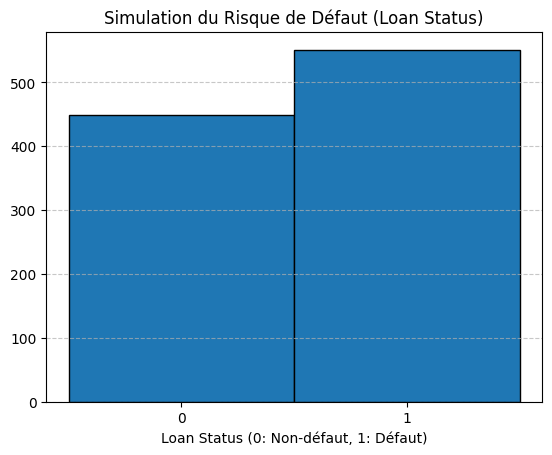

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt



# Définir le nombre de simulations
simulations = 1000

age_mean  =df['person_age'].mean()
age_std = df['person_age'].std()

income_mean = df['person_income'].mean()
income_std = df['person_income'].std()

emp_length_mean = df['person_emp_length'].mean()
emp_length_std = df['person_emp_length'].std()

loan_amnt_mean = df['loan_amnt'].mean()
loan_amnt_std = df['loan_amnt'].std()

loan_int_rate_mean = df['loan_int_rate'].mean()
loan_int_rate_std = df['loan_int_rate'].std()

loan_percent_income_mean = df['loan_percent_income'].mean()
loan_percent_income_std = df['loan_percent_income'].std()

def simulate_data():
    age = random.gauss(age_mean, age_std)
    income = random.gauss(income_mean, income_std)
    emp_length = random.gauss(emp_length_mean, emp_length_std)
    loan_amnt = random.gauss(loan_amnt_mean, loan_amnt_std)
    loan_int_rate = random.gauss(loan_int_rate_mean, loan_int_rate_std)
    loan_percent_income = random.gauss(loan_percent_income_mean, loan_percent_income_std)

    home_ownership = random.choice(['RENT', 'OWN', 'MORTGAGE', 'OTHER'])
    loan_intent = random.choice(['PERSONAL', 'MEDICAL', 'HOMEIMPROVEMENT', 'EDUCATION', 'DEBTCONSOLIDATION'])
    loan_grade = random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    loan_status = random.choice([0, 1])
    default_on_file = random.choice(['Y', 'N'])
    cred_hist_length = random.randint(2, 30)

    return [age, income, home_ownership, emp_length, loan_intent, loan_grade, loan_amnt,
            loan_int_rate, loan_status, loan_percent_income, default_on_file, cred_hist_length]

# Générer les données simulées
simulated_data = [simulate_data() for _ in range(simulations)]

# Créer un DataFrame Pandas à partir des données simulées
columns = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
           'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status',
           'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
simulated_df = pd.DataFrame(simulated_data, columns=columns)

# Fonction pour simuler le risque de défaut (loan_status)
def simulate_default_risk(df, simulations):
    default_risk_simulations = []
    for _ in range(len(simulated_df)):
        # Générer des échantillons aléatoires pour chaque colonne influente
        age = random.choice(simulated_df ['person_age'])
        income = random.choice(simulated_df ['person_income'])
        home_ownership = random.choice(simulated_df ['person_home_ownership'])
        emp_length = random.choice(simulated_df ['person_emp_length'])
        loan_intent = random.choice(simulated_df ['loan_intent'])
        loan_grade = random.choice(simulated_df ['loan_grade'])
        loan_amnt = random.choice(simulated_df ['loan_amnt'])
        loan_int_rate = random.choice(df['loan_int_rate'])
        loan_percent_income = random.choice(simulated_df ['loan_percent_income'])
        cb_person_default_on_file = random.choice(simulated_df ['cb_person_default_on_file'])
        cred_hist_length = random.choice(simulated_df ['cb_person_cred_hist_length'])

        # Calculer le risque de défaut (loan_status) en fonction des échantillons aléatoires

        age_score = 1 if (age < 50 and age>35) else 0
        emp_length_score = 1 if emp_length > 5 else 0
        person_home_ownership_score = 1 if home_ownership == 'OWN' else 0
        loan_grade_score = 1 if loan_grade in ['A', 'B', 'C'] else 0
        cb_person_default_on_file_score = 1 if cb_person_default_on_file == 'N' else 0
        loan_percent_income_score = 1 if loan_percent_income < 0.3 else 0

        risk_score = age_score + emp_length_score + person_home_ownership_score + loan_grade_score + cb_person_default_on_file_score + loan_percent_income_score
        loan_status = 1 if risk_score > 2.5 else 0

        default_risk_simulations.append(loan_status)

    return default_risk_simulations

# Appel de la fonction pour simuler le risque de défaut
default_risk_results = simulate_default_risk(simulated_df , simulations)



# Création de l'histogramme
plt.hist(default_risk_results, bins=[-0.5, 0.5, 1.5], edgecolor='black')  # Utilisation de deux bins pour les valeurs 0 et 1
plt.xlabel('Loan Status (0: Non-défaut, 1: Défaut)')
plt.title('Simulation du Risque de Défaut (Loan Status)')
plt.xticks([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## ***4. Modèle d'apprentissage automatique pour l'évaluation du risque de crédit***
Dans cette partieon va implementer unmodèle d'apprentissage automatique performant qui repose sur des techniques avancées de prétraitement des données, d'entraînement et d'évaluation, pour offrir ainsi une approche robuste pour prédire les défauts de prêts et estimer la probabilité de défaut pour chaque emprunteur. En utilisant des outils tels que RandomForestClassifier et des métriques d'évaluation telles que l'accuracy_score et le rapport de classification, on peut obtenir des résultats fiables et informatifs sur la performance de notre modèle."

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Diviser les données en variables explicatives (X) et variable cible (y)
X = df.drop('loan_status', axis=1)  # X contient toutes les colonnes sauf 'loan_status'
y = df['loan_status']  # y contient la variable cible 'loan_status'

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Précision du modèle : 0.93
Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4488
           1       0.96      0.72      0.82      1239

    accuracy                           0.93      5727
   macro avg       0.94      0.86      0.89      5727
weighted avg       0.94      0.93      0.93      5727



## ***5. Conclusion***
En conclusion, l'utilisation de la simulation pour évaluer le risque de crédit offre une approche robuste et probabiliste pour anticiper les scénarios financiers potentiels. En combinant cette méthodologie avec un modèle d'apprentissage automatique, nous pouvons améliorer la précision de nos prévisions en prenant en compte des variables complexes et en utilisant des données réelles.

## ***6. Bibliographie***
* OpenAI. "ChatGPT: A Conversational AI Model." OpenAI, 2022, https://openai.com/chatgpt. Consulté pour obtenir de l'aide et des informations sur le sujet.
* Yamanaka, H. (année). Monte Carlo Simulation in Finance. https://yamanakah.github.io/finance/monte-carlo/
* FasterCapital. (année). Credit Risk Simulation: How to Use Monte Carlo Methods for Credit Risk. https://fastercapital.com/content/Credit-Risk-Simulation--How-to-Use-Monte-Carlo-Methods-for-Credit-Risk.html
* FasterCapital. (année). Credit Risk Modeling in Python: How to Use Python for Credit Risk Analysis. https://fastercapital-com.translate.goog/content/Credit-risk-modeling-python--How-to-Use-Python-for-Credit-Risk-Analysis.html?_x_tr_sl=en&_x_tr_tl=fr&_x_tr_hl=fr&_x_tr_pto=wapp
* Kaggle. (année). Credit Risk Assessment Notebook. https://www.kaggle.com/code/prabalkhangura/credit-risk-assessment/notebook